In [1]:
# Let's load the dataset to examine its structure and start the data cleansing process
import pandas as pd

# Load the dataset
file_path = 'dailyActivity_merged.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset and basic information
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

(           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
 0  1503960366    4/12/2016       13162           8.50             8.50   
 1  1503960366    4/13/2016       10735           6.97             6.97   
 2  1503960366    4/14/2016       10460           6.74             6.74   
 3  1503960366    4/15/2016        9762           6.28             6.28   
 4  1503960366    4/16/2016       12669           8.16             8.16   
 
    LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
 0                       0.0                1.88                      0.55   
 1                       0.0                1.57                      0.69   
 2                       0.0                2.44                      0.40   
 3                       0.0                2.14                      1.26   
 4                       0.0                2.71                      0.41   
 
    LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
 0     

In [2]:
# Check for duplicated data
duplicate_count = df.duplicated().sum()

# Transform 'ActivityDate' from string to datetime format
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

# Display result of duplicate check and the new data type of ActivityDate
duplicate_count, df['ActivityDate'].dtype


(0, dtype('<M8[ns]'))

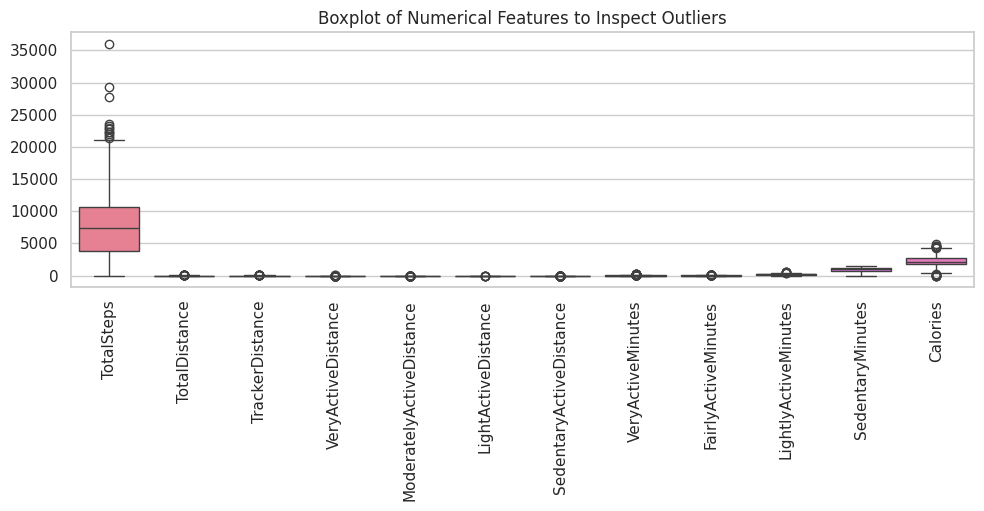

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot size and style
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# Plot boxplots for the numerical features to identify potential outliers
numerical_columns = ['TotalSteps', 'TotalDistance', 'TrackerDistance', 'VeryActiveDistance',
                     'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance',
                     'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
                     'SedentaryMinutes', 'Calories']

# Plot boxplots for all numerical features to visually inspect outliers
plt.subplot(2, 1, 1)
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features to Inspect Outliers")

plt.tight_layout()
plt.show()


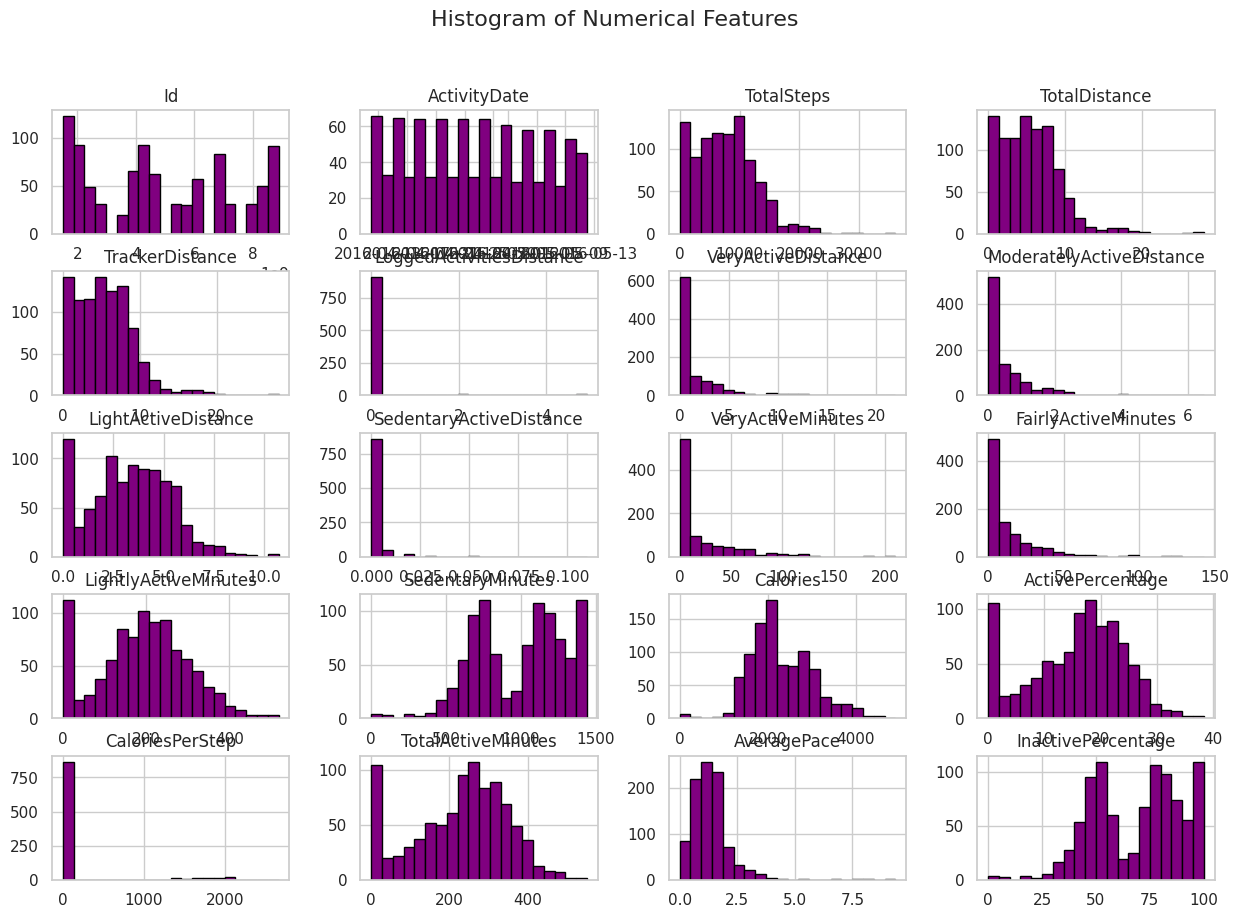

In [7]:
import matplotlib.pyplot as plt

# Plot histogram untuk semua fitur numerik
df.hist(figsize=(15, 10), bins=20, color='purple', edgecolor='black')
plt.suptitle('Histogram of Numerical Features', fontsize=16)
plt.show()


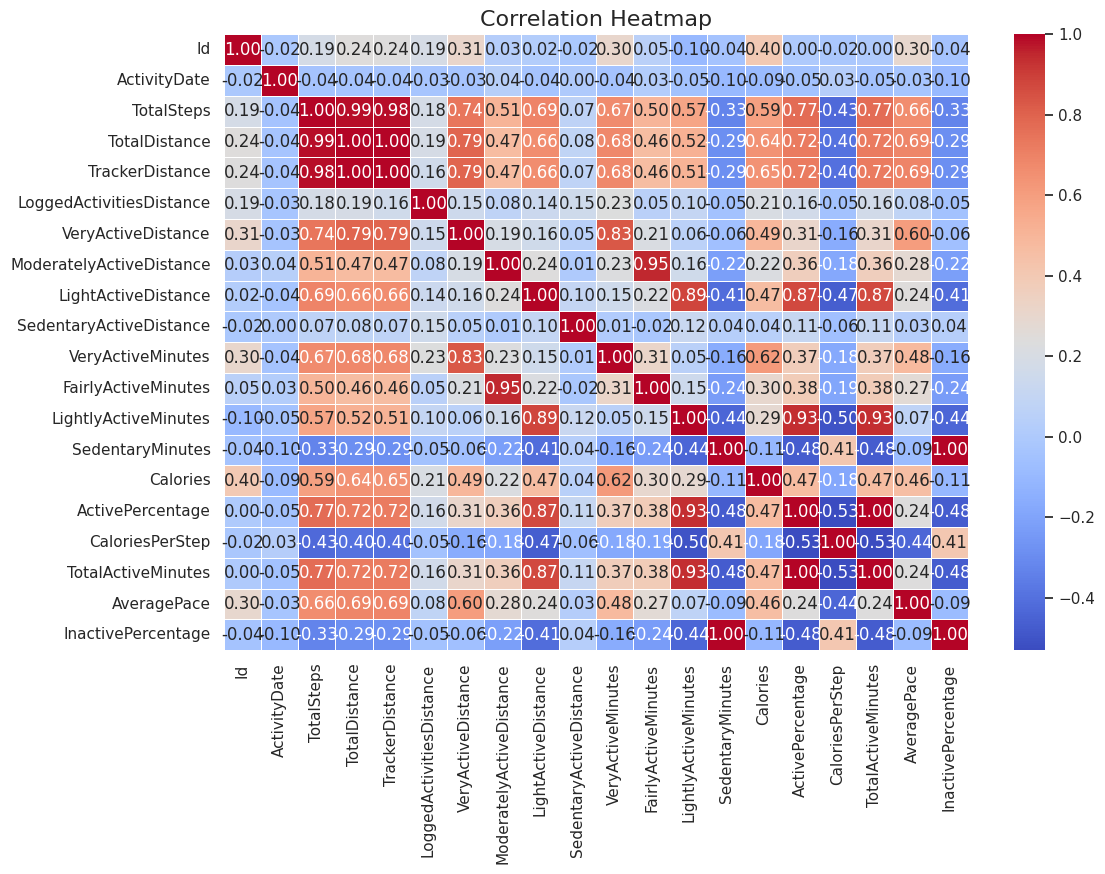

In [8]:
import seaborn as sns
import numpy as np

# Correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


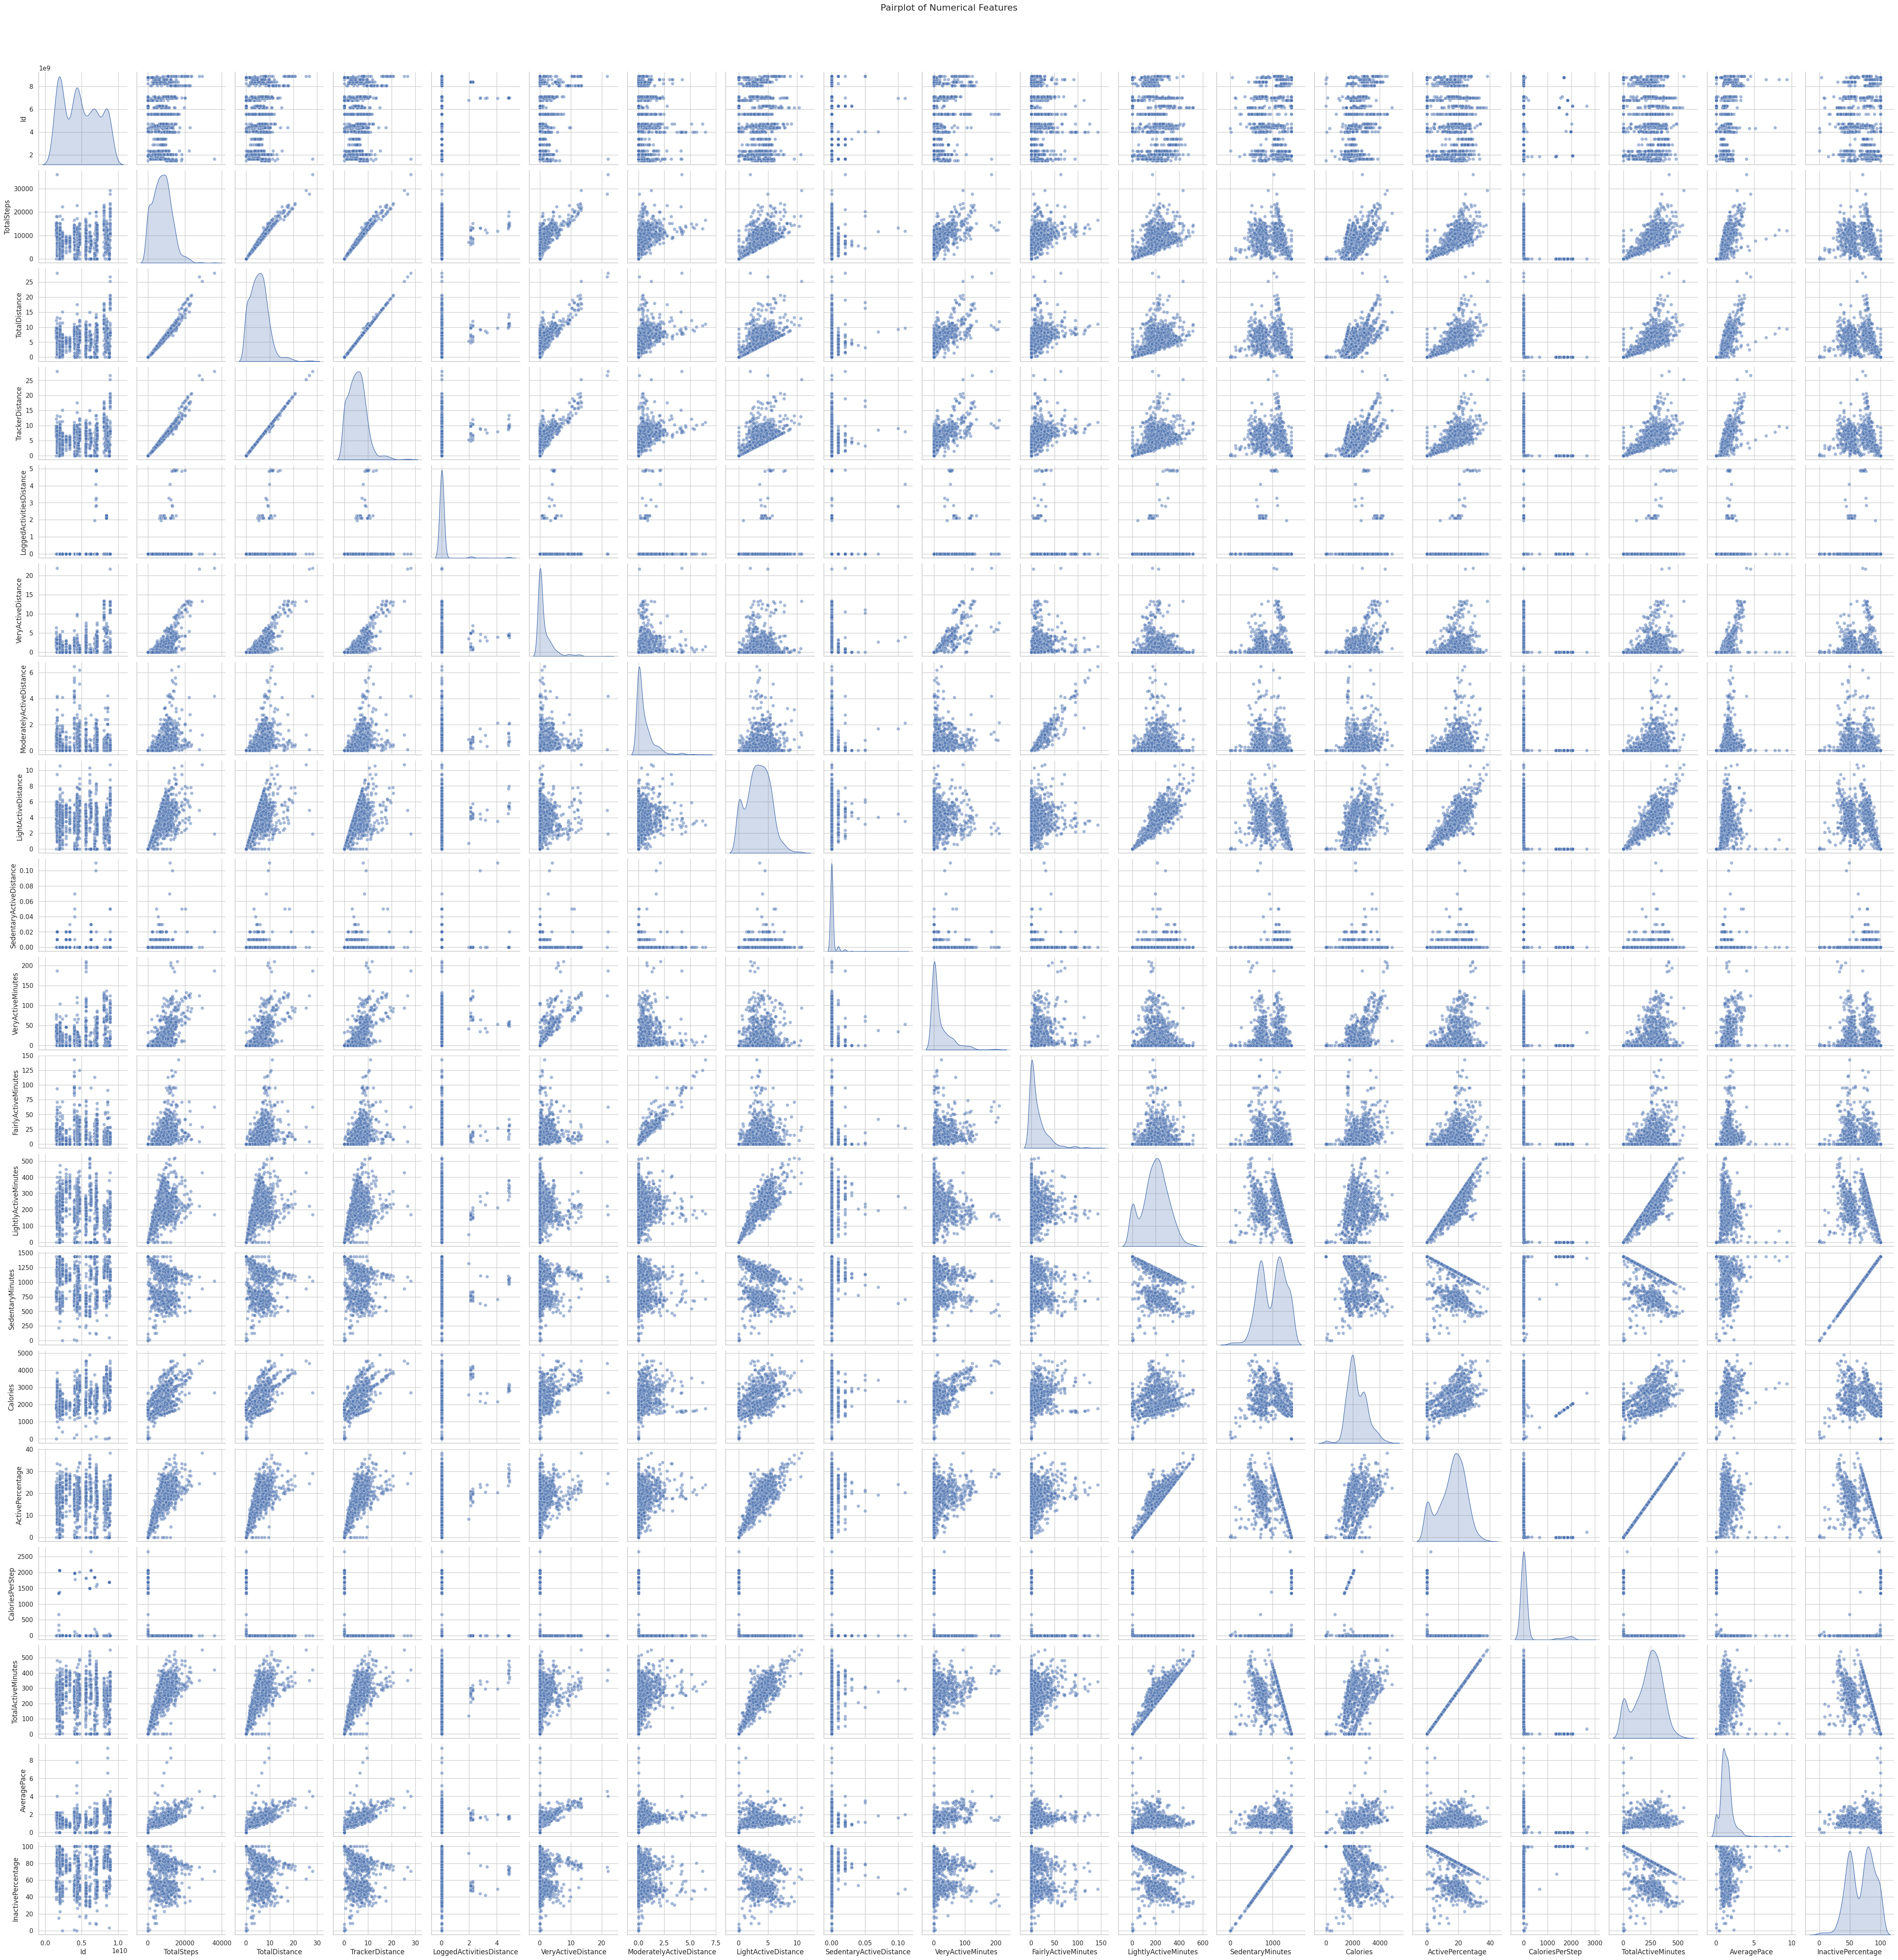

In [9]:
# Pairplot untuk fitur numerik
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Numerical Features', y=1.02, fontsize=16)
plt.show()


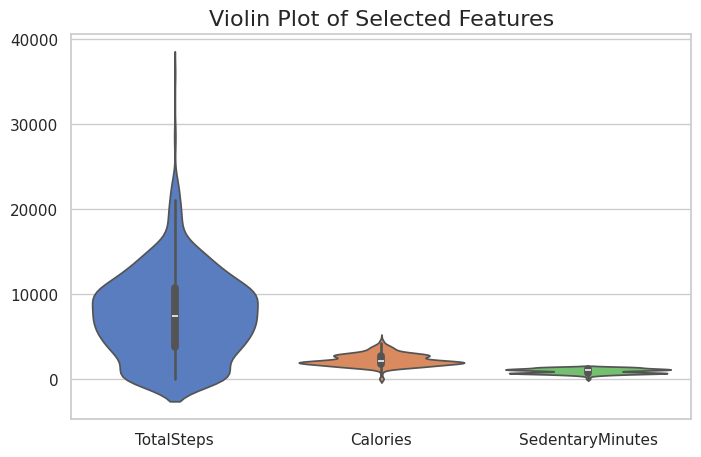

In [12]:
# Violin plot untuk beberapa fitur
plt.figure(figsize=(8, 5))
sns.violinplot(data=df[['TotalSteps', 'Calories', 'SedentaryMinutes']], palette="muted")
plt.title('Violin Plot of Selected Features', fontsize=16)
plt.show()


In [5]:
# 1. ActivePercentage: (VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes) / Total minutes in a day (1440)
df['ActivePercentage'] = (df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']) / 1440 * 100

# 2. CaloriesPerStep: Calories burned per step (avoid division by zero)
df['CaloriesPerStep'] = df['Calories'] / df['TotalSteps'].replace(0, 1)

# 3. AveragePace: TotalDistance / (ActiveMinutes in hours)
df['TotalActiveMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']
df['AveragePace'] = df['TotalDistance'] / (df['TotalActiveMinutes'] / 60).replace(0, 1)  # convert minutes to hours

# 4. InactivePercentage: (SedentaryMinutes / Total minutes in a day) * 100
df['InactivePercentage'] = (df['SedentaryMinutes'] / 1440) * 100

df[['ActivePercentage', 'CaloriesPerStep', 'AveragePace', 'InactivePercentage']].head()


ActivePercentage  CaloriesPerStep  AveragePace  InactivePercentage
0         25.416667         0.150813     1.393443           50.555556
1         17.847222         0.167396     1.627237           53.888889
2         15.416667         0.169790     1.821622           84.583333
3         18.888889         0.178754     1.385294           50.416667
4         18.541667         0.147052     1.833708           53.680556

###Baris 0:
- ActivePercentage: 25.42%
Orang ini aktif selama 25.42% dari total waktu yang tersedia dalam sehari (1440 menit). Ini berarti sekitar 366 menit (25.42% dari 1440) dihabiskan untuk aktivitas fisik.
- CaloriesPerStep: 0.150813
Orang ini membakar sekitar 0.15 kalori untuk setiap langkah yang mereka ambil.
- AveragePace: 1.393443
Kecepatan rata-rata mereka adalah 1.39 unit jarak per jam aktivitas aktif (berdasarkan total jarak dan waktu aktif).
- InactivePercentage: 50.56% dari harinya dihabiskan dalam keadaan tidak aktif, atau sekitar 728 menit (12 jam).
###Baris 1:
- ActivePercentage: 17.85%
Orang ini aktif selama 17.85% dari total waktu dalam sehari, sekitar 257 menit dihabiskan untuk aktivitas fisik.
- CaloriesPerStep: 0.167396
Orang ini membakar sekitar 0.17 kalori untuk setiap langkah.
- AveragePace: 1.627237
Kecepatan rata-rata mereka adalah 1.63 unit jarak per jam waktu aktif.
- InactivePercentage: 53.89% dari waktu sehari dihabiskan untuk tidak aktif, sekitar 775 menit (lebih dari 12 jam).
###Baris 2:
- ActivePercentage: 15.42%
Orang ini aktif selama 15.42% dari total waktu dalam sehari, atau sekitar 222 menit dihabiskan untuk aktivitas fisik.
- CaloriesPerStep: 0.169790
Orang ini membakar sekitar 0.17 kalori per langkah.
AveragePace: 1.821622
Kecepatan rata-rata mereka adalah 1.82 unit jarak per jam waktu aktif.
- InactivePercentage: 84.58% dari harinya dihabiskan dalam keadaan tidak aktif, atau sekitar 1216 menit (sekitar 20 jam).
###Baris 3:
- ActivePercentage: 18.89%
Orang ini aktif selama 18.89% dari waktu sehari, sekitar 272 menit dihabiskan untuk aktivitas fisik.
- CaloriesPerStep: 0.178754
Mereka membakar sekitar 0.18 kalori per langkah.
- AveragePace: 1.385294
Kecepatan rata-rata mereka adalah 1.39 unit jarak per jam waktu aktif.
- InactivePercentage: 50.42% dari hari ini dihabiskan dalam keadaan tidak aktif, sekitar 727 menit.
###Baris 4:
- ActivePercentage: 18.54%
Orang ini aktif selama 18.54% dari waktu sehari, sekitar 267 menit dihabiskan untuk aktivitas fisik.
- CaloriesPerStep: 0.147052
Mereka membakar sekitar 0.15 kalori per langkah.
- AveragePace: 1.833708
Kecepatan rata-rata mereka adalah 1.83 unit jarak per jam waktu aktif.
- InactivePercentage: 53.68% dari waktu sehari dihabiskan untuk tidak aktif, sekitar 773 menit.